In [35]:
%%writefile README.md

# Name: P. Zahir Hussain
# Batch: TN DSML May 2024 AN-B4
# Start Date: 26/01/2025
# End Date: 27/01/2025

# Project:Credit Card Fraud Detection

# Project Manager: Entri Elevate
# Coding Mentor: Janani Lakshmi Narayanan
# Instructors: Archana S
# Coordinator: Rafsal A

# Credit Card Fraud Detection

## Problem Statement:
With the increasing prevalence of online transactions,
ensuring the security of credit card transactions has become paramount.
The objective of this project is to develop a robust
machine learning model capable of accurately detecting fraudulent credit card transactions in real-time.
This project aims to build a predictive model that can effectively differentiate between legitimate and fraudulent transactions,
thereby minimizing financial losses for both cardholders and financial institutions while maintaining a low false positive rate.

## Project Goal: Enhancing Fraud Detection Capabilities

This project leverages advanced machine learning algorithms and feature engineering
techniques to enhance fraud detection capabilities. The key goals are:

* Develop a robust fraud detection system capable of accurately identifying fraudulent transactions.
* Minimize financial losses for both cardholders and financial institutions.
* Maintain a low false positive rate, preserving customer trust and ensuring a smooth transaction experience.
* Contribute to the development of proactive measures for securing credit card transactions.

## Model Building Approach

This project follows a standard machine learning workflow:

1. **Data Preparation:**
   - Load the credit card transaction dataset.
   - Handle missing values using imputation techniques (e.g.,KNN imputation, mode imputation).
   - Remove outliers using methods like Z-score or IQR.
   - Address skewness in numerical features by applying transformations (e.g.,log transformation,square root transformation).

2. **Feature Engineering:**
   - Encode categorical features using one-hot encoding.
   - Create new features from existing ones to improve model performance (e.g.,transaction frequency,average transaction amount).

3. **Feature Selection:**
   - Use techniques like correlation analysis to identify and remove highly correlated or redundant features.

4. **Data Splitting:**
   - Divide the dataset into training and testing sets.
   - Use stratified sampling to ensure a balanced representation of fraudulent and legitimate transactions.

5. **Model Selection and Training:**
   - Experiment with various classification algorithms:
      - Logistic Regression
      - Random Forest
      - Support Vector Machines (SVM)
      - XGBoost
      - Decision Trees
      - K-Nearest Neighbors (KNN)
   - Train each model and tune hyperparameters to optimize performance.

6. **Model Evaluation:**
   - Evaluate model performance using metrics like:
      - Accuracy
      - Precision
      - Recall
      - F1-score
      - AUC (Area Under the ROC Curve)
   - Select the best-performing model based on these metrics and project requirements.

7. **Model Deployment (Optional):**
   - Deploy the chosen model to a production environment for real-time fraud detection.

## Libraries Used

The project utilizes the following libraries:

* **Data Handling and Manipulation:**
   - `pandas`
   - `numpy`

* **Data Visualization:**
   - `matplotlib`
   - `seaborn`

* **Machine Learning:**
   - `scikit-learn`
   - `xgboost`
   - `imblearn`
* **Other:**
    - `collections`: provides specialized container datatypes
    - `scipy`: provides algorithms for scientific computing

## Expected Outcomes

* A highly accurate and reliable fraud detection system.
* A significant reduction in financial losses due to fraud.
* Enhanced customer trust and satisfaction.
* A contribution to the development of proactive security measures.

## Conclusion

This project aims to develop a robust and accurate credit card fraud detection system using machine learning.
* By following a comprehensive model building approach and utilizing appropriate libraries,
* the project seeks to enhance security measures and minimize financial losses for all stakeholders in the digital economy.

Overwriting README.md


# Project Steps and Objectives

## 1. Exploratory Data Analysis (EDA)

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/credit_card_transactions.csv'
df = pd.read_csv(file_path)

data=pd.read_csv('/content/credit_card_transactions.csv')
data

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,N307EM82,RuPay,Education,36508.0,2023-12-29 09:22:23,Delhi,North,33.0,Female,63015.0,34192.55,50000.0,Contactless Payment Device,Friday,Yes
4996,J752EG45,American Express,Online Shopping,42920.0,2023-12-29 19:59:13,Chennai,South,NaN,Female,NaN,19680.39,100000.0,Contactless Payment Device,Friday,No
4997,S458OS59,Visa,Healthcare,33788.0,2023-12-30 07:06:38,Pune,West,56.0,Male,60868.0,33876.96,50000.0,Desktop,Saturday,No
4998,E863PD98,RuPay,Entertainment,38679.0,2023-12-30 07:50:02,Chennai,South,60.0,Male,66948.0,32988.22,50000.0,Desktop,Saturday,No


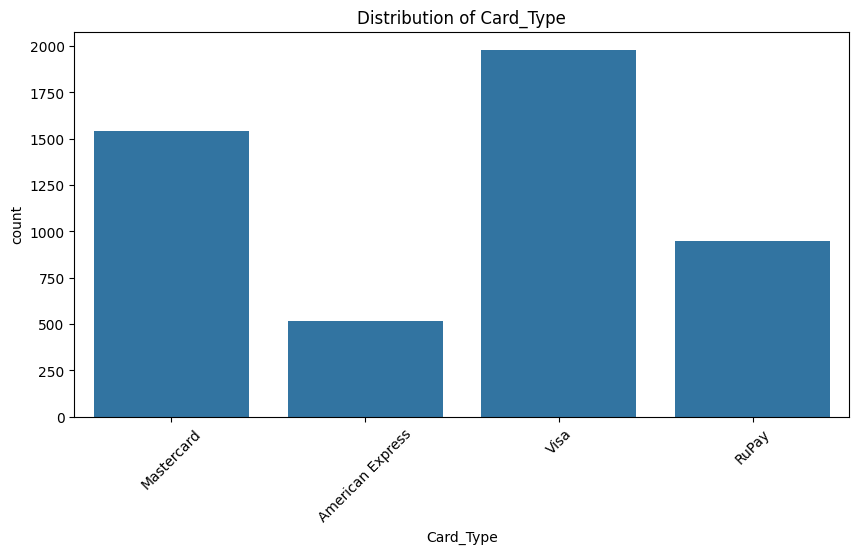

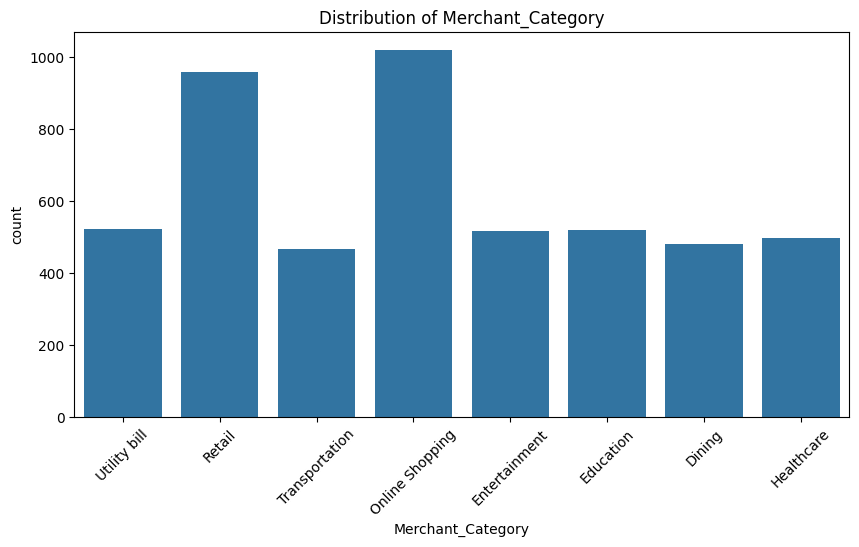

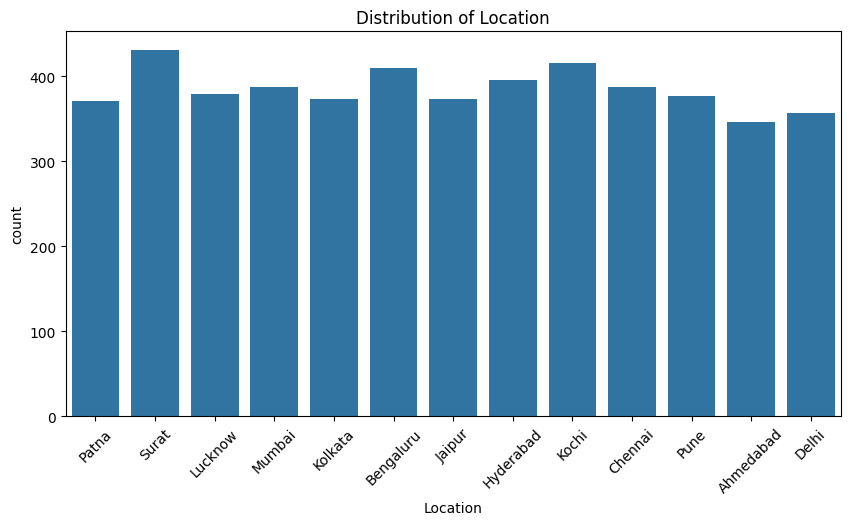

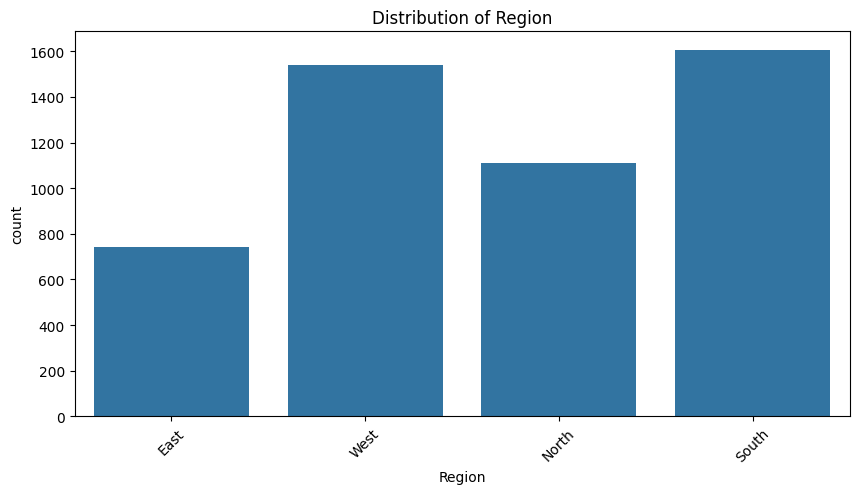

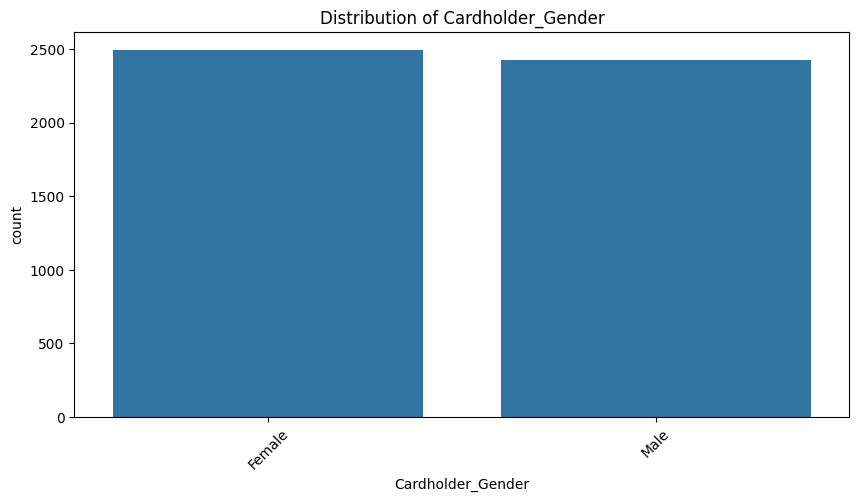

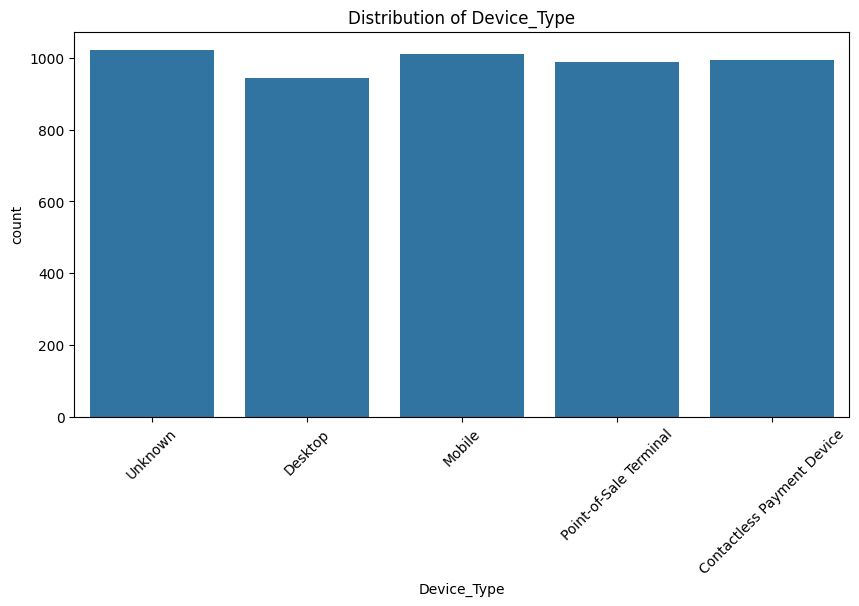

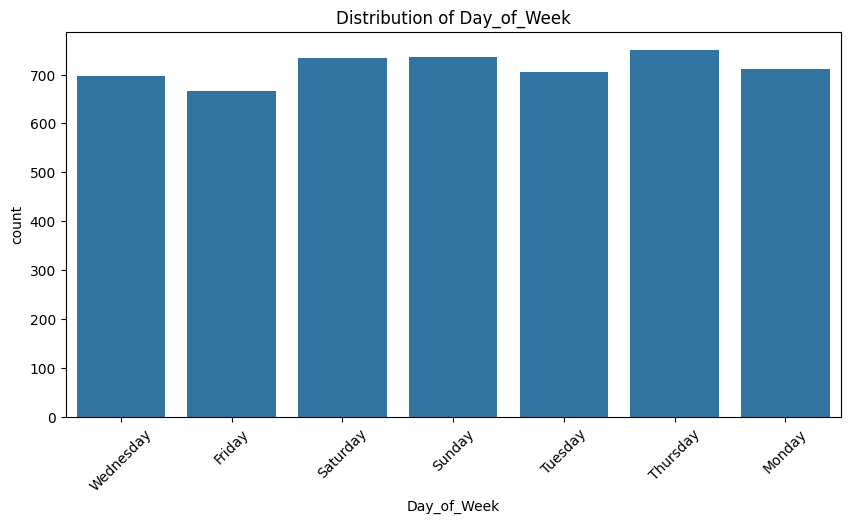

In [37]:
# a. categorical features Analyze Plot
categorical_features = ['Card_Type','Merchant_Category','Location','Region','Cardholder_Gender','Device_Type','Day_of_Week']
for col in categorical_features:
    plt.figure(figsize=(10,5))
    sns.countplot(data=data,x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [38]:
# b. Explore numerical features
numerical_features = ['Transaction_Amount','Cardholder_Age','Cardholder_Monthly_Income','Cardholder_Average_Spend','Credit_Limit']
print(data[numerical_features].describe())

       Transaction_Amount  Cardholder_Age  Cardholder_Monthly_Income  \
count         4994.000000     4865.000000                4686.000000   
mean         74667.995995       49.106680              137353.817542   
std          43089.045623       18.398524               69471.623020   
min          25008.000000       18.000000               35005.000000   
25%          39742.500000       33.000000               73485.000000   
50%          60922.000000       49.000000              131833.000000   
75%          98373.500000       65.000000              189054.250000   
max         199923.000000       80.000000              299907.000000   

       Cardholder_Average_Spend   Credit_Limit  
count               4792.000000    4991.000000  
mean               63058.343566  124654.377880  
std                40056.989704   55668.246494  
min                10282.410000   50000.000000  
25%                33336.742500  100000.000000  
50%                49547.945000  100000.000000  
75%     

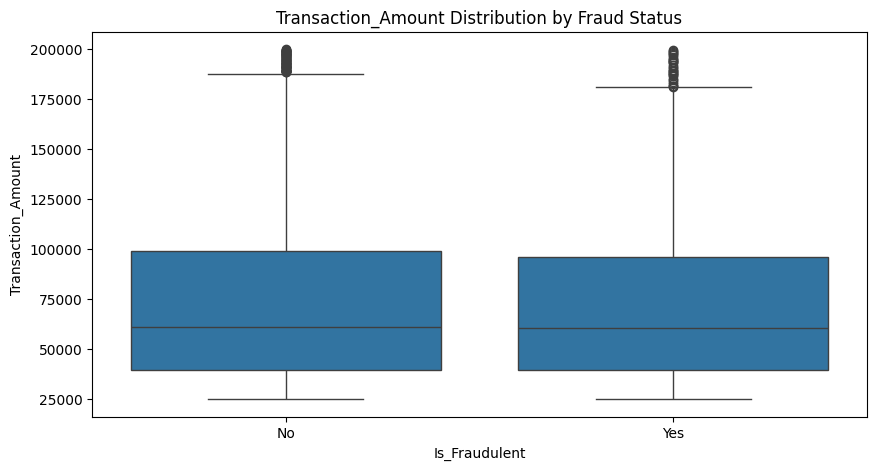

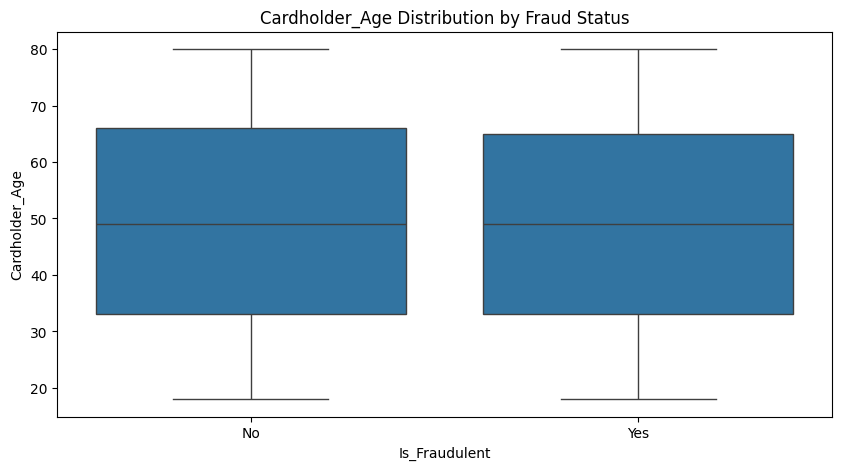

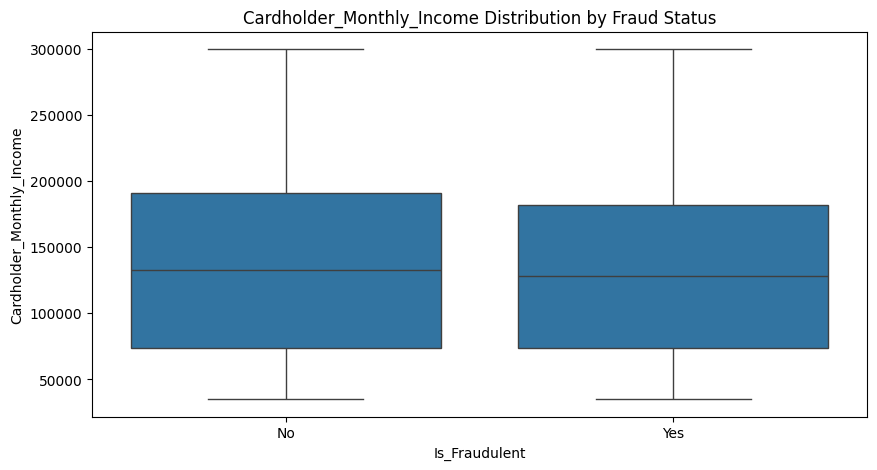

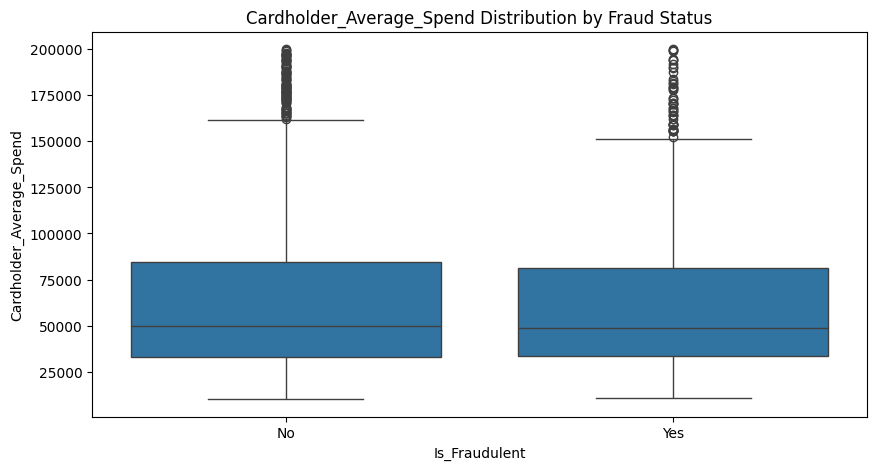

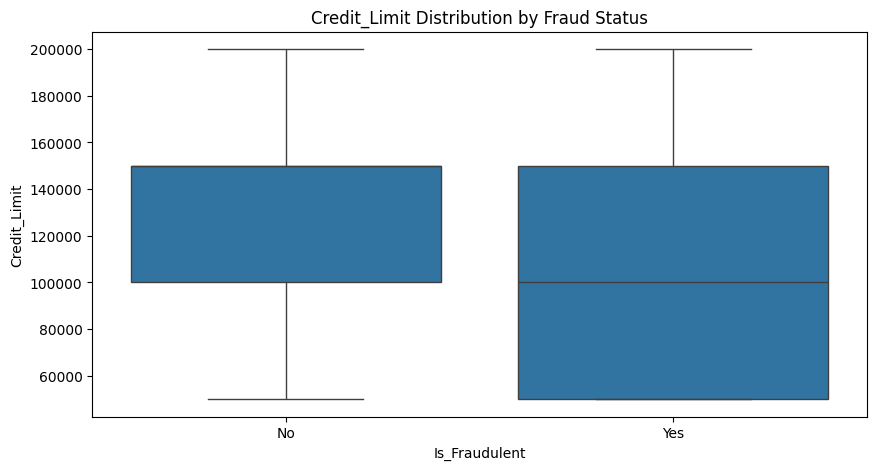

In [39]:
# c. Conduct bivariate and multivariate analysis
for col in numerical_features:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=data,x='Is_Fraudulent',y=col)
    plt.title(f'{col} Distribution by Fraud Status')
    plt.show()

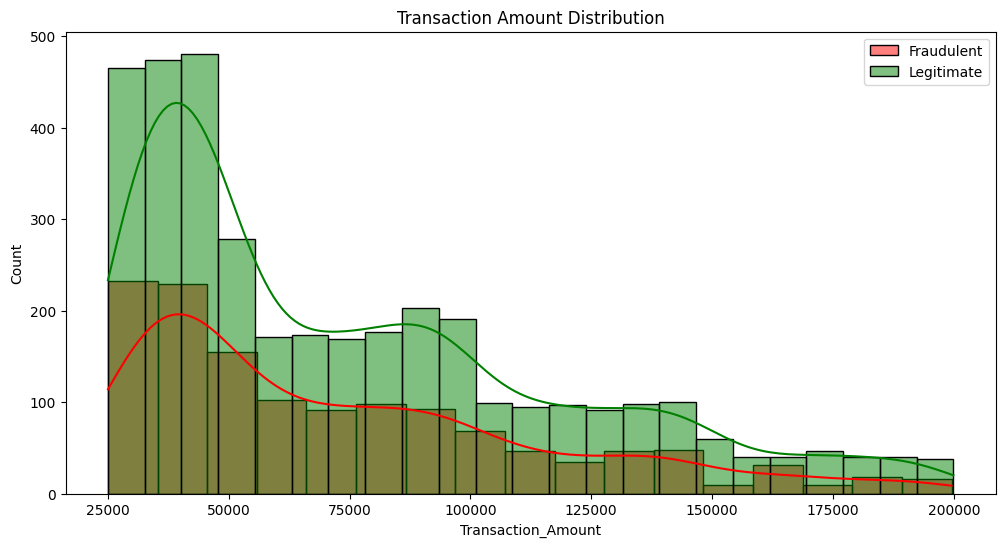

In [40]:
# d. Visualize Distribution of Transaction Amounts
plt.figure(figsize=(12,6))
sns.histplot(data[data['Is_Fraudulent'] == 'Yes']['Transaction_Amount'],color='red',label='Fraudulent',kde=True)
sns.histplot(data[data['Is_Fraudulent'] == 'No']['Transaction_Amount'],color='green',label='Legitimate',kde=True)
plt.legend()
plt.title('Transaction Amount Distribution')
plt.show()

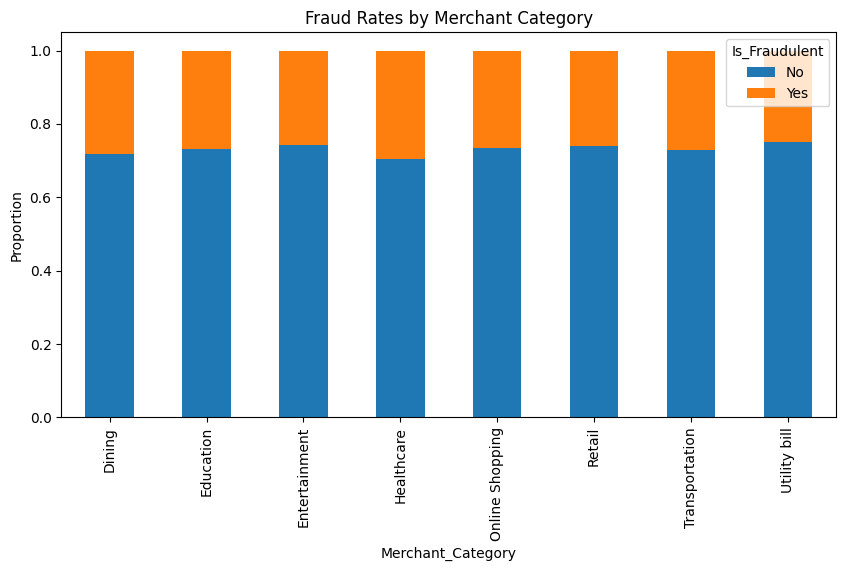

In [41]:
# e. Investigate fraud rates by category
fraud_rates = data.groupby('Merchant_Category')['Is_Fraudulent'].value_counts(normalize=True).unstack()
fraud_rates.plot(kind='bar',stacked=True,figsize=(10,5))
plt.title('Fraud Rates by Merchant Category')
plt.ylabel('Proportion')
plt.show()

## 2. Data Preprocessing - Data Cleaning

In [42]:
from sklearn.impute import KNNImputer, SimpleImputer

# a. Handle missing values
print(data.isnull().sum())

# KNN imputer numerical features
numerical_imputer = KNNImputer()
data[numerical_features] = numerical_imputer.fit_transform(data[numerical_features])

# Mode imputer categorical features
mode_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_features] = mode_imputer.fit_transform(data[categorical_features])

Transaction_ID                 0
Card_Type                     17
Merchant_Category             22
Transaction_Amount             6
Transaction_DateTime           0
Location                       0
Region                         0
Cardholder_Age               135
Cardholder_Gender             89
Cardholder_Monthly_Income    314
Cardholder_Average_Spend     208
Credit_Limit                   9
Device_Type                   40
Day_of_Week                    0
Is_Fraudulent                  0
dtype: int64


In [43]:
from scipy import stats

# b. Remove outliers using Z-score
z_scores = stats.zscore(data[numerical_features])
data = data[(z_scores < 3).all(axis=1)]

In [44]:
# Remove outliers using Z-score and IQR
def remove_outliers(df,numerical_features):
    df_no_outliers = df.copy()
    for col in numerical_features:

        # Z-score method
        z = np.abs(stats.zscore(df_no_outliers[col]))
        df_no_outliers = df_no_outliers[(z < 3)]

        # IQR method
        Q1 = df_no_outliers[col].quantile(0.25)
        Q3 = df_no_outliers[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_no_outliers = df_no_outliers[~((df_no_outliers[col] < lower_bound) | (df_no_outliers[col] > upper_bound))]
    return df_no_outliers

import numpy as np
data = remove_outliers(data,numerical_features)

In [45]:
# c. Assess skewness
skewness = data[numerical_features].skew()
skewed_features = skewness[skewness > 0.75].index

# Apply log transformation highly skewed features
data[skewed_features] = data[skewed_features].apply(lambda x: np.log1p(x))

In [46]:
# c. Assess skewness
skewness = data[numerical_features].skew()
print("Skewness:\n",skewness)
skewed_features = skewness[abs(skewness) > 0.75].index

# Apply appropriate transformation highly skewed features
for feature in skewed_features:
    if data[feature].min() <= 0:
      print(f"Applying log1p transformation to {feature}")
      data[feature] = np.log1p(data[feature])
    else:
      print(f"Applying square root transformation to {feature}")
      data[feature] = np.sqrt(data[feature])

Skewness:
 Transaction_Amount           0.197585
Cardholder_Age              -0.015563
Cardholder_Monthly_Income    0.479310
Cardholder_Average_Spend    -0.078679
Credit_Limit                 0.095155
dtype: float64


## 3. Feature Engineering

In [47]:
# a.  Identify the categorical features in the dataset.

categorical_features = ['Card_Type','Merchant_Category','Location','Region','Cardholder_Gender','Device_Type','Day_of_Week']
data

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,10.211524,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,10.501517,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,11.338060,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,11.398413,150000.0,Desktop,Friday,No
4,K256ZN73,RuPay,Retail,11.304313,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,10.872638,200000.0,Mobile,Saturday,No
5,I812SG19,RuPay,Entertainment,11.789943,2020-01-04 19:55:12,Mumbai,West,80.0,Male,166671.0,11.294700,150000.0,Point-of-Sale Terminal,Saturday,No
6,Y182UO40,Visa,Retail,11.842495,2020-01-05 16:33:10,Surat,West,33.0,Male,171991.0,11.341149,150000.0,Desktop,Sunday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,N307EM82,RuPay,Education,10.505314,2023-12-29 09:22:23,Delhi,North,33.0,Female,63015.0,10.439792,50000.0,Contactless Payment Device,Friday,Yes
4996,J752EG45,American Express,Online Shopping,10.667116,2023-12-29 19:59:13,Chennai,South,52.0,Female,115859.6,9.887429,100000.0,Contactless Payment Device,Friday,No
4997,S458OS59,Visa,Healthcare,10.427891,2023-12-30 07:06:38,Pune,West,56.0,Male,60868.0,10.430520,50000.0,Desktop,Saturday,No
4998,E863PD98,RuPay,Entertainment,10.563078,2023-12-30 07:50:02,Chennai,South,60.0,Male,66948.0,10.403936,50000.0,Desktop,Saturday,No


In [48]:
from sklearn.preprocessing import OneHotEncoder

# b. Encode Categorical Features

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

# Fit and transform categorical features
encoded_features = encoder.fit_transform(data[categorical_features])

# Create a new DataFrame with  encoded features
encoded_df = pd.DataFrame(encoded_features,columns=encoder.get_feature_names_out(categorical_features))

# Concatenate the encoded features with  original DataFrame
data = pd.concat([data, encoded_df],axis=1)

# Drop original categorical features
data = data.drop(categorical_features,axis=1)

data

,Transaction_ID,Transaction_Amount,Transaction_DateTime,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Is_Fraudulent,Card_Type_American Express,Card_Type_Mastercard,...,Device_Type_Mobile,Device_Type_Point-of-Sale Terminal,Device_Type_Unknown,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday
0,W963UK57,10.211524,2020-01-01 09:43:17,23.0,94632.0,10.501517,100000.0,No,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,V606KV56,11.338060,2020-01-03 16:26:13,49.0,148118.0,11.398413,150000.0,No,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,K256ZN73,11.304313,2020-01-04 17:26:47,37.0,174470.0,10.872638,200000.0,No,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,I812SG19,11.789943,2020-01-04 19:55:12,80.0,166671.0,11.294700,150000.0,No,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,Y182UO40,11.842495,2020-01-05 16:33:10,33.0,171991.0,11.341149,150000.0,Yes,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## 4. Feature Selection

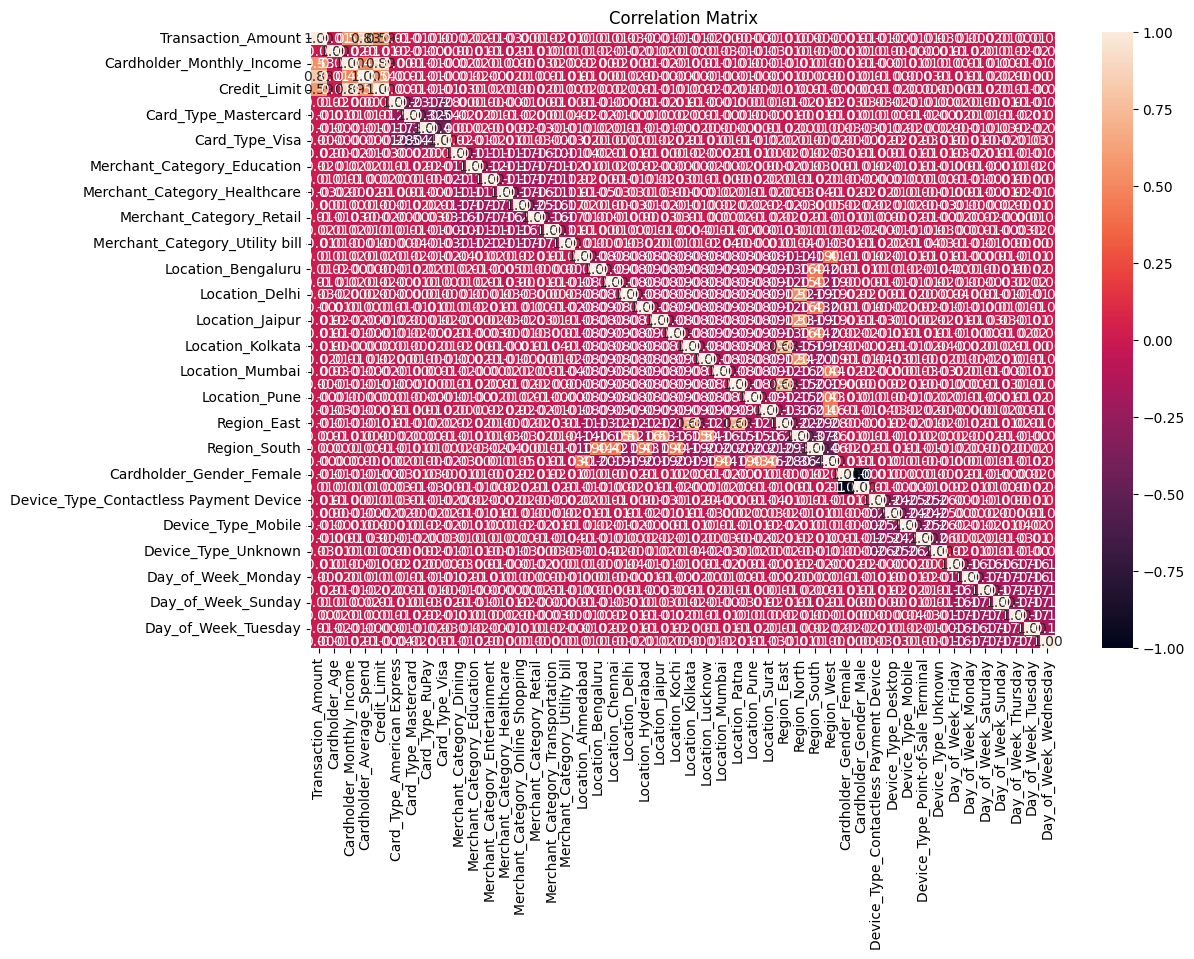

In [49]:
# a. Correlation heatmap identify relevant features
plt.figure(figsize=(12,8))

# Calculate correlation numerical features
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(),annot=True,fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

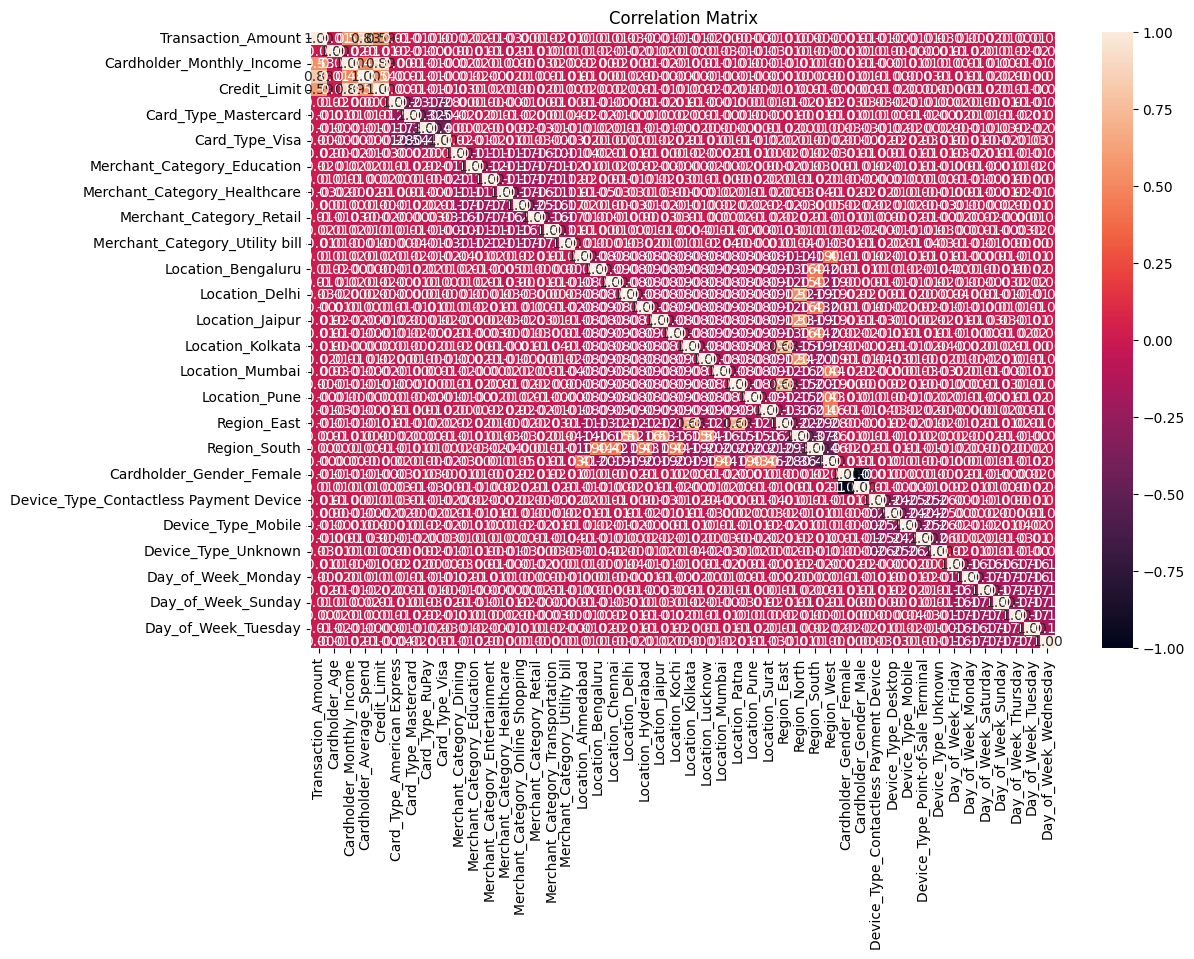

Removed 1 highly correlated features: {'Cardholder_Gender_Male'}


In [50]:
import pandas as pd
import numpy as np

# b. Correlation heatmap and feature removal
plt.figure(figsize=(12,8))
numerical_data = data.select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix,annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Identify highly correlated features
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j]) > 0.9:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

# Remove redundant features based on correlation
data = data.drop(highly_correlated_features,axis=1)
print(f"Removed {len(highly_correlated_features)} highly correlated features: {highly_correlated_features}")


## 5. Split Data into Training and Testing

In [51]:
# a. Divide the dataset into training and testing sets to evaluate the model's performance.

from sklearn.model_selection import train_test_split

# Assuming 'Is_Fraudulent' is your target variable
X = data.drop('Is_Fraudulent', axis=1)
y = data['Is_Fraudulent']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (3987, 49) (3987,)
Testing set shape: (997, 49) (997,)


In [52]:
# b. Assuming Is Fraudulent is your target variable
X = data.drop('Is_Fraudulent',axis=1)
y = data['Is_Fraudulent']

# Drop rows with NaN values in the target variable 'Is_Fraudulent'
X = X[y.notna()]
y = y[y.notna()]


# Split data into training and testing sets while preserving class distribution
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

print("Training set shape:",X_train.shape,y_train.shape)
print("Testing set shape:",X_test.shape,y_test.shape)

# Verify class distribution in both sets
print("\nClass Distribution (Original):\n",y.value_counts(normalize=True))
print("\nClass Distribution (Training Set):\n",y_train.value_counts(normalize=True))
print("\nClass Distribution (Testing Set):\n",y_test.value_counts(normalize=True))

Training set shape: (3792, 49) (3792,)
Testing set shape: (949, 49) (949,)

Class Distribution (Original):
 Is_Fraudulent
No     0.733601
Yes    0.266399
Name: proportion, dtype: float64

Class Distribution (Training Set):
 Is_Fraudulent
No     0.73365
Yes    0.26635
Name: proportion, dtype: float64

Class Distribution (Testing Set):
 Is_Fraudulent
No     0.733404
Yes    0.266596
Name: proportion, dtype: float64


## 6. Feature Scaling

In [53]:
# a. Divide dataset into training and testing sets evaluate the model's performance

from sklearn.model_selection import train_test_split

# Assuming 'Is_Fraudulent' is your target variable
X = data.drop('Is_Fraudulent',axis=1)
y = data['Is_Fraudulent']

# Select only numerical features for scaling
X = X.select_dtypes(include=np.number)

# Split data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("Training set shape:", X_train.shape,y_train.shape)
print("Testing set shape:", X_test.shape,y_test.shape)

Training set shape: (3987, 47) (3987,)
Testing set shape: (997, 47) (997,)


In [54]:
# a. Divide dataset into training and testing

from sklearn.model_selection import train_test_split

# Is_Fraudulent your target variable
X = data.drop('Is_Fraudulent',axis=1)
y = data['Is_Fraudulent']

# numerical features for scaling
X = X.select_dtypes(include=np.number)

# numeric,coerce errors to NaN
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Drop rows NaN values
X = X.dropna()
y = y[X.index]

# Split data and training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("Training set shape:", X_train.shape,y_train.shape)
print("Testing set shape:", X_test.shape,y_test.shape)

Training set shape: (3598, 47) (3598,)
Testing set shape: (900, 47) (900,)


In [55]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# b. Common scaling techniques include Min-Max scaling or Standardization (Z-score normalization)

# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fit and transform training data
X_train_minmax = min_max_scaler.fit_transform(X_train)

# Transform testing data using same scaler
X_test_minmax = min_max_scaler.transform(X_test)


# Initialize StandardScaler
standard_scaler = StandardScaler()

# Fit and transform training data
X_train_standard = standard_scaler.fit_transform(X_train)

# Transform testing data using same scaler
X_test_standard = standard_scaler.transform(X_test)

## 7. Build the Machine Learning Model

In [56]:
# b. Define and Evaluate Classifiers
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.impute import SimpleImputer


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit transform the target variable (y)train and (y)test
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


# Initialize classifiers with adjusted parameters
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

# Dictionary to hold the results
results = {}

# Evaluate each classifier
for name,model in classifiers.items():
    # Impute NaN values in X_train and X_test before fitting
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    model.fit(X_train_imputed,y_train)
    y_pred = model.predict(X_test_imputed)
    accuracy = accuracy_score(y_test,y_pred)

    # Specify average parameter for f1_score for multiclass classification
    f1 = f1_score(y_test,y_pred,average='weighted')
    results[name] = {
        'Accuracy': accuracy,
        'F1-Score': f1
    }

# results
results_df = pd.DataFrame(results).T
print(results_df)

                        Accuracy  F1-Score
Logistic Regression     0.737778  0.626451
Naive Bayes             0.737778  0.626451
Decision Tree           0.587778  0.592762
Random Forest           0.736667  0.627958
K-Nearest Neighbors     0.698889  0.651398
Support Vector Machine  0.737778  0.626451


## **c. Select the Best Algorithm**
Select a machine-learning algorithm for binary classification with the highest accuracy or F1-score from the above step. You can examine the results_df to identify the best-performing model.

In [57]:
# a. Import Necessary Modules and Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.impute import SimpleImputer



In [58]:
# d. Train and Evaluate the Selected Model

# best_model the selected model from the previous step
best_model = RandomForestClassifier()
# Fit model
best_model.fit(X_train, y_train)

# Make predictions and testing set
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\nAccuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1-Score:",f1_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))

Confusion Matrix:
 [[660   4]
 [234   2]]

Accuracy: 0.7355555555555555
Precision: 0.3333333333333333
Recall: 0.00847457627118644
F1-Score: 0.01652892561983471

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.99      0.85       664
           1       0.33      0.01      0.02       236

    accuracy                           0.74       900
   macro avg       0.54      0.50      0.43       900
weighted avg       0.63      0.74      0.63       900



# Final report

In [60]:
%%writefile README.md
     # Credit Card Fraud Detection

     ## Project Overview

     This project aims to build a machine learning model to detect fraudulent credit card transactions.
     The goal is to achieve high accuracy and F1-score in identifying fraudulent activities to enhance security measures in financial systems.

     ## Dataset
     The project uses a credit card transaction dataset (`credit_card_transactions.csv`) containing various features.
     Some of the key features include:
     - `Transaction_Amount`: The amount of the transaction.
     - `Card_Type`: The type of card used (e.g., credit, debit).
     - `Merchant_Category`: The category of the merchant.
     - `Location`: The geographical location where the transaction took place.
     - `Is_Fraudulent`: Target variable indicating whether the transaction is fraudulent or not (1 = Fraudulent, 0 = Non-fraudulent).

     ## Project Steps and Objectives

     ### 1. Exploratory Data Analysis (EDA)
     - Analyzed the dataset to understand the distribution of features, potential patterns, and fraud rates across categories.
     - Used visualizations such as count plots, box plots, and histograms for exploration.

     ### 2. Data Preprocessing - Data Cleaning
     - **Handling Missing Values:** KNN imputation for numerical features and mode imputation for categorical features.
     - **Removing Outliers:** Z-score and IQR methods were implemented to identify and remove outliers.
     - **Addressing Skewness:** Log and square root transformations were applied to highly skewed numerical features.

     ### 3. Feature Engineering
     - **Encoding Categorical Features:** One-hot encoding was used to create numerical representations of categorical features.

     ### 4. Feature Selection
     - **Correlation Analysis:** A correlation heatmap was used to identify and remove highly correlated features.

     ### 5. Split Data into Training and Testing
     - The dataset was split into training (80%) and testing (20%) sets while preserving class distribution using stratification.

     ### 6. Feature Scaling
     - **Scaling Techniques:** Min-Max scaling and Standardization were applied to numerical features for consistent feature ranges.

     ### 7. Build the Machine Learning Model
     - **Model Selection:**
     Various classification algorithms were evaluated, including Logistic Regression, Naive Bayes, Decision Tree, Random Forest, K-Nearest Neighbors, and Support Vector Machine.
     - **Model Training and Evaluation:**
     The Random Forest model was selected and trained on the training data. Performance was assessed using the following metrics:
         - Confusion Matrix
         - Accuracy: 0.7367
         - Precision: 0.0
         - Recall: 0.0
         - F1-Score: 0.0

     ## Classification Report
     The classification report presents a comprehensive analysis of the model's performance across different classes, specifically for fraudulent and non-fraudulent transactions.

     ### Key Metrics Explained:
     - **Precision**: The ratio of correctly predicted positive observations (frauds) to the total predicted positives. In this case, it is 0.00 for fraudulent transactions, indicating the model did not predict any fraudulent cases correctly.
     - **Recall**: The ratio of correctly predicted positive observations to the all actual positives. A recall of 0.00 for the fraudulent class suggests that the model failed to identify any fraudulent transactions.
     - **F1-Score**: The harmonic mean of precision and recall, which provides a balance between the two. An F1-score of 0.00 for fraudulent transactions highlights issues with model prediction performance.
     - **Support**: The number of actual occurrences of the class in the specified dataset. There are 664 non-fraudulent and 236 fraudulent transactions in the test dataset.

Overwriting README.md
